In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Classification Functions**

In [ ]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

#function to train and evaluate an svm classifier
#call this with your train and test data (x_train, y_train, x_test, y_test)
#supply additional svc parameters (kernel, c, etc.) via **kwargs if needed.
def classify_svc(x_train, y_train, x_test, y_test, **kwargs):
    #initialize svm model with any given hyperparameters
    clf = SVC(**kwargs)

    #fit the model on training set (features/labels)
    clf.fit(x_train, y_train)

    #predict class labels for the test set
    y_pred = clf.predict(x_test)

    #compute and print overall accuracy on test set
    accuracy_clf = accuracy_score(y_test, y_pred)
    print(f"classification accuracy: {accuracy_clf}")

    #print detailed precision/recall/f1 report per class
    print("classification report", classification_report(y_test, y_pred))

    #visualize the confusion matrix for test predictions
    cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    cmd.plot(cmap=plt.cm.Blues)

#function for training and evaluating a random forest classifier
#use for multi-feature and multi-class problems. randomforestclassifier is robust to feature scaling.
def classify_rf(x_train, y_train, x_test, y_test, **kwargs):
    #initialize random forest model; reproducible results with random_state
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(x_train, y_train)

    #generate predictions for the test set
    y_pred_clf = rf_classifier.predict(x_test)

    #accuracy score (proportion classified correctly)
    accuracy_clf = accuracy_score(y_test, y_pred_clf)
    print(f"classification accuracy: {accuracy_clf}")

    #per-class metrics
    print("classification report", classification_report(y_test, y_pred_clf))

    #confusion matrix visualization for error analysis
    conf_matrix = confusion_matrix(y_test, y_pred_clf)
    cmd = ConfusionMatrixDisplay(conf_matrix)
    cmd.plot(cmap=plt.cm.Blues)

#function for logistic regression classification (for binary or multiclass problems)
#handles linearly separable data; supports additional configuration via **kwargs.
def classify_logistic(x_train, y_train, x_test, y_test, **kwargs):
    #initialize the logistic regression model (increase max_iter if convergence warnings appear)
    clf = LogisticRegression(max_iter=1000, **kwargs)
    clf.fit(x_train, y_train)

    #predict target labels for test set
    y_pred = clf.predict(x_test)

    #calculate overall test accuracy
    accuracy_clf = accuracy_score(y_test, y_pred)
    print(f"classification accuracy: {accuracy_clf}")

    #print per-class statistics
    print("classification report", classification_report(y_test, y_pred))

    #plot the confusion matrix for true vs. predicted labels
    conf_matrix = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(conf_matrix)
    cmd.plot(cmap=plt.cm.Blues)

# **Hyperparameter Tuning Functions**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def best_svc_params_gridsearch(X_train, y_train, param_grid):
    """
    Performs a grid search to find the best hyperparameters for an SVC.
    """
    base_clf = SVC()
    grid_search = GridSearchCV(base_clf, param_grid=param_grid, cv=5, scoring='f1',verbose=3)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


    #use grid_search.best_estimator_ as the best model to do .transform n all
    return grid_search

def best_svc_params_randomizedsearch(X_train, y_train, param_grid):
    """
    Performs randomized search to find the best hyperparameters for an SVC.
    """
    base_clf = SVC()
    rand_search = RandomizedSearchCV(base_clf,param_distributions=param_grid)
    rand_search.fit(X_train, y_train)

    print(f"Best parameters found: {rand_search.best_params_}")
    print(f"Best cross-validation score: {rand_search.best_score_:.4f}")

    return rand_search

# **Regression Functions**

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor


def plot_residual(y_true, y_pred, residuals, title="Residual Plot"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='dodgerblue', edgecolor='k', s=60)

    plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)

    plt.title(title, fontsize=14)
    plt.xlabel("Predicted Values", fontsize=12)
    plt.ylabel("Residuals (y_true - y_pred)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


def get_training_scores(X_train, y_train, X_test, y_test):
    scoreList = []

    for i in range(1, 5):
        poly = PolynomialFeatures(i)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        pred = model.predict(X_test_poly)

        scoreList.append(r2_score(y_test, pred))

    return scoreList


def regress_linear(X_train, y_train, X_test, y_test, degree=3):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    pred = model.predict(X_test_poly)

    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)

    print(f"\\nPolynomial Linear Regression (Degree {degree})")
    print(f"R2 Score: {r2}")
    print(f"Mean Squared Error: {mse}")

    residuals = y_test - pred
    plot_residual(y_test, pred, residuals, f"Poly Linear Reg D={degree}")


def regress_bagging(X_train, y_train, X_test, y_test):
    regr = BaggingRegressor(estimator=SVR(), n_estimators=80, random_state=0, n_jobs=-1)
    regr.fit(X_train, y_train)

    y_pred = regr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- Bagging Regressor (SVR Base) ---")
    print("R2 Score:", r2)
    print("Mean Squared Error:", mse)


def regress_rf(X_train, y_train, X_test, y_test):
    rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf_regressor.fit(X_train, y_train)

    y_pred_reg = rf_regressor.predict(X_test)
    mse_reg = mean_squared_error(y_test, y_pred_reg)
    r2_reg = r2_score(y_test, y_pred_reg)

    print("\n--- Random Forest Regressor ---")
    print("R2 Score:", r2_reg)
    print("Mean Squared Error:", mse_reg)

    residuals = y_test - y_pred_reg
    return residuals, y_pred_reg


def compare_regs(X_train, y_train, X_test, y_test, regressors):
    print("\n--- Comparing Multiple Regression Models ---")
    for name, model in regressors.items():
        try:
            model.fit(X_train, y_train)
            y_pred_reg = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred_reg)
            r2 = r2_score(y_test, y_pred_reg)

            print(f"{name} Regressor - MSE: {mse:.4f}, R2 Score: {r2:.4f}")
            residuals = y_test - y_pred_reg

            plot_residual(y_test, y_pred_reg, residuals, name)

        except Exception as e:
            print(f"Error training/evaluating {name}: {e}")

# **EDA Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#can input the entire DF in this
def analyze_feature_distributions(df, target_col='Depression'):

    #Separate feature columns from the target
    features = df.columns.drop(target_col)

    #Identify numerical and categorical features
    numerical_features = df[features].select_dtypes(include=['number']).columns
    categorical_features = df[features].select_dtypes(include=['object', 'category', 'bool']).columns

    print(f"Found {len(numerical_features)} numerical features.")
    print(f"Found {len(categorical_features)} categorical features.")

    # 1. Visualize Numerical Features
    for feat in numerical_features:
        plt.figure(figsize=(10, 5))

        # Create a KDE plot for each class of the target variable
        sns.kdeplot(data=df, x=feat, hue=target_col, fill=True, common_norm=False, palette='viridis')

        plt.title(f'Distribution of "{feat}" by {target_col}', fontsize=14)
        plt.xlabel(feat, fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend(title=target_col, labels=['Depression', 'No Depression'])
        plt.tight_layout()
        plt.show()

    #  2. Visualize Categorical Features
    for feat in categorical_features:
        plt.figure(figsize=(12, 6))

        #create a count plot, grouped by the target variable
        sns.countplot(data=df, x=feat, hue=target_col, palette='viridis')

        plt.title(f'Distribution of "{feat}" by {target_col}', fontsize=14)
        plt.xlabel(feat, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right') #rotate labels for better readability
        plt.legend(title=target_col, labels=['No Depression', 'Depression'])
        plt.tight_layout()
        plt.show()


# analyze_feature_distributions(df, target_col='Depression')


# #One hot encoding the categorical features with the standard way of dropping first column
# df_encoded = pd.get_dummies(df, drop_first=True)


#Either one hot encode the categorical columns first, or only use the numerical columns while inputting the df here.
def plot_feature_target_correlations(df, target_col='Depression'):
    #Calculate correlation of all features with the target column
    # .corr() automatically ignores non-numeric columns
    correlation_series = df.corr()[target_col]

    #Remove the target's self-correlation (which is always 1)
    correlation_series = correlation_series.drop(target_col)

    #Sort the values in descending order for better visualization
    correlation_series = correlation_series.sort_values(ascending=False)

    #Plotting with Matplotlib
    plt.figure(figsize=(30, 8))

    #Create the bar plot
    bars = plt.bar(correlation_series.index, correlation_series.values, color=plt.cm.viridis(np.linspace(0, 1, len(correlation_series))))
    #to give it the gradient effect

    plt.title(f'Correlation of Features with "{target_col}"', fontsize=16)
    plt.ylabel('Correlation Coefficient', fontsize=12)
    plt.xlabel('Features', fontsize=12)

    #Rotate feature names for readability
    plt.xticks(rotation=69, ha='right')

    #Add a horizontal line at y=0 for reference
    plt.axhline(0, color='grey', linewidth=1)

    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# plot_feature_target_correlations(df_encoded, target_col='Depression')



#can input the entire df here it will automatically choose the numerical columns only within the function
def plot_grouped_boxplots(df, target_col='Depression'):

    # Select only the numerical columns, excluding the target itself
    numerical_features = df.select_dtypes(include=['number']).columns.drop(target_col, errors='ignore')

    print(f"Generating boxplots for {len(numerical_features)} numerical features...")

    for feature in numerical_features:
        plt.figure(figsize=(8, 5))

        # Create the boxplot using seaborn
        sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')

        plt.title(f'Distribution of "{feature}" by {target_col}', fontsize=14)
        plt.xlabel(target_col, fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.tight_layout()
        plt.show()

# plot_grouped_boxplots(df, target_col='Depression')

# **Preprocessing Functions**

In [ ]:
def num_cat_column_analysis(data:pd.DataFrame) -> tuple :
    for column in data.columns:
        print("=" * 60)
        print(f"Column Analysis for: {column}")
        unique_count = data[column].nunique()
        print(f"    - Total Unique Values (n): {unique_count}")
        is_numerical = pd.api.types.is_numeric_dtype(data[column])

        if is_numerical:
            print("    - Type: Numerical/High Cardinality")
            print(f"    - Min: {data[column].min()}")
            print(f"    - Max: {data[column].max()}")
            print(f"    - Mean: {data[column].mean():.2f}")
        else:
            print("    - Type: Categorical/Ordinal/Low Cardinality")
            print("    - Value Counts:")
            print(data[column].value_counts(dropna=False))

        print("=" * 60)
    numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    return (numerical_cols,categorical_cols)


def num_cat_column_analysis(data:pd.DataFrame) -> tuple :
    for column in data.columns:
        print("=" * 60)
        print(f"Column Analysis for: {column}")
        unique_count = data[column].nunique()
        print(f"    - Total Unique Values (n): {unique_count}")
        is_numerical = pd.api.types.is_numeric_dtype(data[column])

        if is_numerical:
            print("    - Type: Numerical/High Cardinality")
            print(f"    - Min: {data[column].min()}")
            print(f"    - Max: {data[column].max()}")
            print(f"    - Mean: {data[column].mean():.2f}")
        else:
            print("    - Type: Categorical/Ordinal/Low Cardinality")
            print("    - Value Counts:")
            print(data[column].value_counts(dropna=False))

        print("=" * 60)
    numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    return (numerical_cols,categorical_cols)


def rm_rows_with_val(data_cat,column_name,value_to_drop) -> pd.DataFrame :
    # 1. Get the initial count of rows to see how many will be dropped
    initial_row_count = len(data_cat)
    rows_to_drop_count = (data_cat[column_name] == value_to_drop).sum()

    # 2. Drop the rows
    # We use boolean indexing to select all rows EXCEPT those where the column equals 'Others'
    data_cleaned= data_cat[data_cat[column_name] != value_to_drop].copy()

    # 3. Verify the operation
    final_row_count = len(data_cleaned)

    print("=" * 50)
    print(f"Dataset Size Before Drop: {initial_row_count} rows")
    print(f"Rows Dropped ({column_name} is '{value_to_drop}'): {rows_to_drop_count}")
    print(f"Dataset Size After Drop: {final_row_count} rows")
    print("=" * 50)

    # Update your main DataFrame reference
    return data_cleaned


import pandas as pd

def rm_rows_with_rare_cats(df: pd.DataFrame, min_count: int = 10) -> pd.DataFrame:
    initial_rows = len(df)

    # Create a boolean mask initialized to True (meaning keep all rows initially)
    # We will set a row to False (drop) if it contains a rare category
    mask = pd.Series(True, index=df.index)

    print(f"Starting with {initial_rows} rows.")
    print("-" * 40)

    for column in df.columns:
        is_numerical = pd.api.types.is_numeric_dtype(data[column])
        if is_numerical:
            continue
        else:
            #Calculate the frequency of each category in the current column
            category_counts = df[column].value_counts()

            #Identify the categories that are considered "rare"
            rare_categories = category_counts[category_counts < min_count].index

            #Create a temporary mask: True where the value is NOT a rare category
            #If the value is a rare category, the temporary mask is False
            temp_mask = ~df[column].isin(rare_categories)

            #Update the main mask: a row is kept only if ALL previous checks
            #AND the current check are True. If temp_mask is False (rare cat found),
            #the main mask is updated to False for that row.
            mask = mask & temp_mask

            print(f"| {column:<20}: {len(rare_categories)} rare categories found.")

    # Apply the final mask to the DataFrame
    df_cleaned = df[mask].copy()

    final_rows = len(df_cleaned)
    rows_removed = initial_rows - final_rows

    print("-" * 40)
    print(f"Processing Complete.")
    print(f"Total Rows Removed: {rows_removed}")
    print(f"Final Rows Remaining: {final_rows}")

    return df_cleaned


import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

def one_hot_encode_dataframe(df_ohe: pd.DataFrame) -> pd.DataFrame:
    # Ensure all columns are treated as categorical/string before encoding
    for col in df_ohe.columns:
        df_ohe[col] = df_ohe[col].astype(str)

    ohe_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

    # 2. Use ColumnTransformer to apply the OHE to all columns
    # We create a simple passthrough transformer since ALL columns need OHE
    preprocessor = ColumnTransformer(
        transformers=[
            ('ohe', ohe_transformer, df_ohe.columns.tolist())
        ],
        remainder='passthrough', # This is just a formality here, but good practice
        verbose_feature_names_out=False # Use this for cleaner feature names (scikit-learn >= 1.2)
    )

    # 3. Fit and Transform the data (results in a NumPy array)
    data_encoded_array = preprocessor.fit_transform(df_ohe)

    # 4. Get the new feature names
    feature_names = preprocessor.get_feature_names_out()

    # 5. Convert the NumPy array back to a Pandas DataFrame
    df_encoded = pd.DataFrame(
        data_encoded_array,
        columns=feature_names,
        index=df_ohe.index
    )

    return df_encoded.rename(columns=lambda x: x.replace('ohe__', ''))
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def Z_Scaler(data_num) -> pd.DataFrame :
    """
    Performs Z-Score Standardization (Standard Scaling) on numerical data.
    This rescales the data to have a mean of 0 and a standard deviation of 1.

    Args:
        data_num (pd.DataFrame): The input DataFrame containing only numerical columns.

    Returns:
        pd.DataFrame: The standardized DataFrame with original column names and index preserved.
    """

    Scaler=StandardScaler()
    data_num_scaled_array=Scaler.fit_transform(data_num)
    data_num_scaled = pd.DataFrame(
        data_num_scaled_array,
        columns=data_num.columns,
        index=data_num.index
    )
    return data_num_scaled

def MinMax_Scaler(data_num) -> pd.DataFrame :
    """
    Performs Min-Max Normalization on numerical data.
    This rescales the data to a fixed range, typically between 0 and 1.

    Args:
        data_num (pd.DataFrame): The input DataFrame containing only numerical columns.

    Returns:
        pd.DataFrame: The normalized DataFrame with original column names and index preserved.
    """
    Scaler=MinMaxScaler()
    data_num_scaled_array=Scaler.fit_transform(data_num)
    data_num_scaled = pd.DataFrame(
        data_num_scaled_array,
        columns=data_num.columns,
        index=data_num.index
    )
    return data_num_scaled

# Feature Engg & Selection

In [50]:
#input the df BEFORE scaling/normalizing
def feat_eng(df):
  # combining satisfaction from studies and job both and getting average
    df['Average_Satisfaction'] = (df['Study Satisfaction'] + df['Job Satisfaction']) / 2

  # this measures how resilient one is to pressure, we are assuming the hypothesis that if your CGPA is high
  # while having high pressure and studying a lot it means they are more resilient to depression.
  # we could assume the opposite for someone prone to depression.
    df['Resilience'] = df['CGPA'] * (df['Academic Pressure'] + df['Work Pressure']) * df['Work/Study Hours']

  # this feature measures the balance between stress and satisfaction. A high value might indicate an unhealthy balance.
    df['Pressure_Satisfaction_Ratio'] = (df['Academic Pressure'] + df['Work Pressure']) / (df['Average_Satisfaction'] + 0.01)
  # adding a small number to the denominator to avoid division by zero

    return df



import pandas as pd
from sklearn.ensemble import RandomForestClassifier

def select_features_with_rf(X_train, y_train, threshold=0.01):
    """
    Selects features using Random Forest importance scores.

    Args:
        X_train (pd.DataFrame): The training features.
        y_train (pd.Series): The training target.
        threshold (float): The minimum importance score to keep a feature.

    Returns:
        list: A list of the names of the selected features.
    """
    # 1. Train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # 2. Get feature importances
    importances = rf.feature_importances_
    feature_names = X_train.columns

    # Create a DataFrame for easy viewing
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("--- Feature Importances from Random Forest ---")
    print(feature_importance_df)

    # 3. Select features above the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

    selected_feature_names = selected_features['Feature'].tolist()

    print(f"\\nSelected {len(selected_feature_names)} features out of {len(feature_names)} using a threshold of {threshold}.")
    print("Selected Features:", selected_feature_names)

    return selected_feature_names

# --- How to use it ---
# Assume X_train and y_train are ready (after encoding and engineering)
# selected_features_list = select_features_with_rf(X_train, y_train)

# Now you can create your final DataFrames with only the selected features
# X_train_final = X_train[selected_features_list]
# X_test_final = X_test[selected_features_list] # Make sure to apply to X_test as well!


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

def select_features_with_lasso(X_train, y_train):
    """
    Selects features using L1 (Lasso) regularization.

    Returns:
        list: A list of the names of the selected features.
    """
    # Note: For LASSO, it's important that your data is scaled first!
    # Make sure X_train is the output of a scaler.

    # C is the inverse of regularization strength; smaller C means stronger regularization
    # and fewer features selected.
    lasso_selector = SelectFromModel(
        LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=42)
    )

    lasso_selector.fit(X_train, y_train)

    selected_features = X_train.columns[lasso_selector.get_support()]

    print(f"\\n--- LASSO Selection Results ---")
    print(f"Selected {len(selected_features)} features.")
    print("Selected Features:", selected_features.tolist())

    return selected_features.tolist()

# --- How to use it ---
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#
# selected_by_lasso = select_features_with_lasso(X_train_scaled_df, y_train)

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

def apply_pca(X_train_scaled, X_test_scaled, n_components=0.95):
    """
    Applies PCA to the scaled training and testing data.

    Args:
        X_train_scaled (np.array or pd.DataFrame): The scaled training data with selected features.
        X_test_scaled (np.array or pd.DataFrame): The scaled testing data with selected features.
        n_components (float or int):
            - If float (e.g., 0.95), it's the percentage of variance to retain.
            - If int (e.g., 10), it's the exact number of components to keep.

    Returns:
        tuple: A tuple containing:
            - X_train_pca (np.array): The transformed training data.
            - X_test_pca (np.array): The transformed testing data.
            - pca_model (PCA): The fitted PCA object.
    """
    # 1. Initialize PCA
    # We will fit PCA only on the training data
    pca_model = PCA(n_components=n_components, random_state=42)

    # 2. Fit on training data and transform it
    X_train_pca = pca_model.fit_transform(X_train_scaled)

    # 3. Use the same fitted model to transform the test data
    X_test_pca = pca_model.transform(X_test_scaled)

    # --- Reporting ---
    print(f"Original number of features: {X_train_scaled.shape[1]}")
    print(f"Number of components selected: {pca_model.n_components_}")

    explained_variance = np.sum(pca_model.explained_variance_ratio_)
    print(f"Total variance explained by selected components: {explained_variance:.4f}")

    return X_train_pca, X_test_pca, pca_model

# --- How to use the function ---

# Assume you have already done the following:
# 1. Created new features.
# 2. Encoded categorical columns.
# 3. Split into X_train, X_test, y_train, y_test.
# 4. Used Random Forest to get a 'selected_features_list'.
# 5. Created X_train_selected and X_test_selected dataframes.
# 6. Scaled the data:
#    from sklearn.preprocessing import StandardScaler
#    scaler = StandardScaler()
#    X_train_scaled = scaler.fit_transform(X_train_selected)
#    X_test_scaled = scaler.transform(X_test_selected)


# Now, apply PCA to retain 95% of the variance
# X_train_pca, X_test_pca, pca = apply_pca(X_train_scaled, X_test_scaled, n_components=0.95)

# Or, apply PCA to get exactly 10 components
# X_train_pca_10, X_test_pca_10, pca_10 = apply_pca(X_train_scaled, X_test_scaled, n_components=10)


# The output X_train_pca is a NumPy array. You can now use it to train your model.
# For example:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(X_train_pca, y_train)


# **Data Preprocessing**

In [ ]:
data = pd.read_csv("student_depression_dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/student_depression_dataset.csv'
data=pd.read_csv(path)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [ ]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
num_cols,cat_cols=num_cat_column_analysis(data)

Column Analysis for: id
    - Total Unique Values (n): 27901
    - Type: Numerical/High Cardinality
    - Min: 2
    - Max: 140699
    - Mean: 70442.15
Column Analysis for: Gender
    - Total Unique Values (n): 2
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
Gender
Male      15547
Female    12354
Name: count, dtype: int64
Column Analysis for: Age
    - Total Unique Values (n): 34
    - Type: Numerical/High Cardinality
    - Min: 18.0
    - Max: 59.0
    - Mean: 25.82
Column Analysis for: City
    - Total Unique Values (n): 52
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            

In [ ]:
print(f"**Numerical Columns** ({len(num_cols)}):")
print(num_cols)
print()
print(f"**Categorical Columns** ({len(cat_cols)}):")
print(cat_cols)

**Numerical Columns** (9):
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']

**Categorical Columns** (9):
['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


In [ ]:
X=data.drop('Depression',axis=1)
data_new=X.drop('id',axis=1).copy()

In [ ]:
Y=data['Depression']

In [ ]:
column_name = 'Dietary Habits'
value_to_drop = 'Others'
data_new=rm_rows_with_val(data_new,column_name,value_to_drop)

Dataset Size Before Drop: 27901 rows
Rows Dropped (Dietary Habits is 'Others'): 12
Dataset Size After Drop: 27889 rows


In [ ]:
column_name = 'Sleep Duration'
value_to_drop = 'Others'
data_new=rm_rows_with_val(data_new,column_name,value_to_drop)

Dataset Size Before Drop: 27889 rows
Rows Dropped (Sleep Duration is 'Others'): 18
Dataset Size After Drop: 27871 rows


In [ ]:
data_new=rm_rows_with_rare_cats(data_new,10)
#note that financial stress is still a categorical column instead of numerical
#we have now removed the '?'.

Starting with 27871 rows.
----------------------------------------
| Gender              : 0 rare categories found.
| City                : 22 rare categories found.
| Profession          : 13 rare categories found.
| Sleep Duration      : 0 rare categories found.
| Dietary Habits      : 0 rare categories found.
| Degree              : 0 rare categories found.
| Have you ever had suicidal thoughts ?: 0 rare categories found.
| Financial Stress    : 1 rare categories found.
| Family History of Mental Illness: 0 rare categories found.
----------------------------------------
Processing Complete.
Total Rows Removed: 60
Final Rows Remaining: 27811


In [ ]:
num_cols1,cat_cols1=num_cat_column_analysis(data_new)

Column Analysis for: Gender
    - Total Unique Values (n): 2
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
Gender
Male      15497
Female    12314
Name: count, dtype: int64
Column Analysis for: Age
    - Total Unique Values (n): 34
    - Type: Numerical/High Cardinality
    - Min: 18.0
    - Max: 59.0
    - Mean: 25.82
Column Analysis for: City
    - Total Unique Values (n): 30
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
City
Kalyan           1563
Srinagar         1370
Hyderabad        1337
Vasai-Virar      1287
Lucknow          1154
Thane            1139
Ludhiana         1107
Agra             1090
Surat            1078
Kolkata          1064
Jaipur           1033
Patna            1006
Pune              968
Visakhapatnam     967
Ahmedabad         946
Bhopal            933
Chennai           884
Meerut            820
Rajkot            815
Bangalore         765
Delhi             765
Ghaziabad         743
Mumbai            697
Vadodara          6

In [ ]:
data_num=data_new[num_cols1]
data_cat=data_new[cat_cols1]

In [ ]:
#Financial stress needs to go to numerical columns after removal of  '?'.
data_num['Financial Stress']=data_cat['Financial Stress']
data_cat=data_cat.drop('Financial Stress',axis=1)
data_num['Financial Stress'] = pd.to_numeric(data_num['Financial Stress'], errors='raise')

# #target is a numerical column
# data_num=data_num.drop(['id','Depression'],axis=1)

# # removal of '?'
#column_name = 'Financial Stress'
# print(f"Initial unique values: {data_num[column_name].unique()}")
# data_num[column_name] = data_num[column_name].replace('?', np.nan)
# data_num['Financial Stress'] = pd.to_numeric(data_num['Financial Stress'], errors='raise')
# print(f"New data type for '{column_name}': {data_num[column_name].dtype}")
# print(f"Number of missing values (NaN) now: {data_num[column_name].isna().sum()}")

# #imputation with median
# median_value = data_num[column_name].median()
# data_num[column_name]=data_num[column_name].fillna(median_value)
# print(f"Imputed NaN with median: {median_value}")
# print(f"Missing values after imputation: {data_num[column_name].isna().sum()}")

/tmp/ipython-input-1345118520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Financial Stress']=data_cat['Financial Stress']
/tmp/ipython-input-1345118520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Financial Stress'] = pd.to_numeric(data_num['Financial Stress'], errors='raise')


In [ ]:
data_num.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,27811.000000,27811.000000,27811.000000,27811.000000,27811.000000,27811.000000,27811.000000,27811.000000
mean,25.819496,3.141059,0.000431,7.655950,2.943871,0.000683,7.159254,3.140088
std,4.907076,1.381904,0.044063,1.471008,1.360952,0.044466,3.706694,1.437018
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,2.000000,0.000000,6.280000,2.000000,0.000000,4.000000,2.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000


In [ ]:
data_num.columns

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')

In [ ]:
data_cat.columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [ ]:
#label encoding using .map() for two columns sleep duration and dietary habits as they have ordinal categories.
sleep_mapping = {
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'":4,

    # Add other categories if they exist (e.g., 'More than 8 hours': 4)
}
diet_mapping = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}

data_cat['Sleep Duration_Encoded'] = data_cat['Sleep Duration'].map(sleep_mapping)
data_cat['Dietary Habits_Encoded'] = data_cat['Dietary Habits'].map(diet_mapping)

In [ ]:
data_cat

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Sleep Duration_Encoded,Dietary Habits_Encoded
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,Yes,No,2,3
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,No,Yes,2,2
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,No,Yes,1,3
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes,Yes,3,2
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,Yes,No,2,2
...,...,...,...,...,...,...,...,...,...,...
27896,Female,Surat,Student,'5-6 hours',Unhealthy,'Class 12',Yes,Yes,2,1
27897,Male,Ludhiana,Student,'Less than 5 hours',Healthy,MSc,No,Yes,1,3
27898,Male,Faridabad,Student,'5-6 hours',Unhealthy,MD,No,No,2,1
27899,Female,Ludhiana,Student,'Less than 5 hours',Healthy,'Class 12',Yes,No,1,3


In [ ]:
data_cat['Dietary Habits_Encoded'].value_counts()

,count
Dietary Habits_Encoded,
1,10287
2,9897
3,7627


In [ ]:
data_cat['Sleep Duration_Encoded'].value_counts()

,count
Sleep Duration_Encoded,
1,8290
3,7324
2,6166
4,6031


In [ ]:
df_new_feat = feat_eng(data_num)

/tmp/ipython-input-3788373956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Satisfaction'] = (df['Study Satisfaction'] + df['Job Satisfaction']) / 2
/tmp/ipython-input-3788373956.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resilience'] = df['CGPA'] * (df['Academic Pressure'] + df['Work Pressure']) * df['Work/Study Hours']
/tmp/ipython-input-3788373956.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
data_ohe=data_cat.drop(['Sleep Duration','Dietary Habits','Sleep Duration_Encoded','Dietary Habits_Encoded'],axis=1)
df_new_feat[['Sleep Duration','Dietary Habits']]=data_cat[['Sleep Duration_Encoded','Dietary Habits_Encoded']]
data_num_scaled_Z=Z_Scaler(df_new_feat)
data_num_scaled_MM=MinMax_Scaler(df_new_feat)

/tmp/ipython-input-3472732372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_feat[['Sleep Duration','Dietary Habits']]=data_cat[['Sleep Duration_Encoded','Dietary Habits_Encoded']]


In [ ]:
data_num_scaled_MM

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits
0,0.365854,1.0,0.0,0.897,0.4,0.0,0.250000,0.00,0.285714,0.224250,0.009901,0.333333,1.0
1,0.146341,0.4,0.0,0.590,1.0,0.0,0.250000,0.25,0.714286,0.059000,0.001594,0.333333,0.5
2,0.317073,0.6,0.0,0.703,1.0,0.0,0.750000,0.00,0.714286,0.316350,0.002390,0.000000,1.0
3,0.243902,0.6,0.0,0.559,0.4,0.0,0.333333,1.00,0.285714,0.111800,0.005941,0.666667,0.5
4,0.170732,0.8,0.0,0.813,0.6,0.0,0.083333,0.00,0.428571,0.054200,0.005298,0.333333,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.219512,1.0,0.0,0.575,1.0,0.0,0.583333,0.00,0.714286,0.335417,0.003984,0.333333,0.0
27897,0.219512,0.4,0.0,0.940,0.6,0.0,0.000000,0.50,0.428571,0.000000,0.002649,0.000000,1.0
27898,0.317073,0.6,0.0,0.661,0.8,0.0,1.000000,0.25,0.571429,0.396600,0.002985,0.333333,0.0
27899,0.000000,1.0,0.0,0.688,0.4,0.0,0.833333,1.00,0.285714,0.573333,0.009901,0.000000,1.0


In [ ]:
data_num_scaled_Z

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits
0,1.463322,1.345226,-0.009793,0.893315,-0.693550,-0.015364,-1.122113,-1.489283,-0.694179,-0.310171,0.364560,-0.354082,1.374954
1,-0.370797,-0.825730,-0.009793,-1.193727,1.510830,-0.015364,-1.122113,-0.793385,1.510604,-1.059013,-0.401308,-0.354082,0.120028
2,1.055740,-0.102078,-0.009793,-0.425532,1.510830,-0.015364,0.496610,-1.489283,1.510604,0.107186,-0.327849,-1.241552,1.374954
3,0.444367,-0.102078,-0.009793,-1.404470,-0.693550,-0.015364,-0.852326,1.294309,-0.694179,-0.819746,-0.000555,0.533388,0.120028
4,-0.167006,0.621574,-0.009793,0.322268,0.041243,-0.015364,-1.661687,-1.489283,0.040749,-1.080764,-0.059795,-0.354082,0.120028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.240576,1.345226,-0.009793,-1.295700,1.510830,-0.015364,-0.042965,-1.489283,1.510604,0.193588,-0.180930,-0.354082,-1.134898
27897,0.240576,-0.825730,-0.009793,1.185637,0.041243,-0.015364,-1.931474,-0.097487,0.040749,-1.326375,-0.304011,-1.241552,1.374954
27898,1.055740,-0.102078,-0.009793,-0.711056,0.776036,-0.015364,1.305971,-0.793385,0.775676,0.470844,-0.273028,-0.354082,-1.134898
27899,-1.593543,1.345226,-0.009793,-0.527505,-0.693550,-0.015364,0.766397,1.294309,-0.694179,1.271723,0.364560,-1.241552,1.374954


In [ ]:
data_ohe.describe()

,Gender,City,Profession,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27811,27811,27811,27811,27811,27811
unique,2,30,1,28,2,2
top,Male,Kalyan,Student,'Class 12',Yes,No
freq,15497,1563,27811,6074,17594,14348


In [ ]:
data_ohe=one_hot_encode_dataframe(data_ohe)

In [ ]:
data_ohe.columns

Index(['Gender_Male', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan',
       'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar', 'City_Surat',
       'City_Thane', 'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam', 'Degree_B.Arch', 'Degree_B.Com', 'Degree_B.Ed',
       'Degree_B.Pharm', 'Degree_B.Tech', 'Degree_BA', 'Degree_BBA',
       'Degree_BCA', 'Degree_BE', 'Degree_BHM', 'Degree_BSc', 'Degree_LLB',
       'Degree_LLM', 'Degree_M.Com', 'Degree_M.Ed', 'Degree_M.Pharm',
       'Degree_M.Tech', 'Degree_MA', 'Degree_MBA', 'Degree_MBBS', 'Degree_MCA',
       'Degree_MD', 'Degree_ME', 'Degree_MHM', 'Degree_MSc', 'Degree_Others',
       'Degree_PhD', 'Have you ever had s

In [ ]:
data_final=pd.concat([data_num_scaled_Z,data_ohe],axis=1)

In [ ]:
data_final #final preprocessed data with scaled numerical columns adn label encoded columns and One hot encoded column(bulk of th e columns)
#69 columns ==> 59 One hot encoded : 2 z_scaled label encoded : 8 z_scaled numerical columns

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,1.463322,1.345226,-0.009793,0.893315,-0.693550,-0.015364,-1.122113,-1.489283,-0.694179,-0.310171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.370797,-0.825730,-0.009793,-1.193727,1.510830,-0.015364,-1.122113,-0.793385,1.510604,-1.059013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.055740,-0.102078,-0.009793,-0.425532,1.510830,-0.015364,0.496610,-1.489283,1.510604,0.107186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.444367,-0.102078,-0.009793,-1.404470,-0.693550,-0.015364,-0.852326,1.294309,-0.694179,-0.819746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.167006,0.621574,-0.009793,0.322268,0.041243,-0.015364,-1.661687,-1.489283,0.040749,-1.080764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.240576,1.345226,-0.009793,-1.295700,1.510830,-0.015364,-0.042965,-1.489283,1.510604,0.193588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
27897,0.240576,-0.825730,-0.009793,1.185637,0.041243,-0.015364,-1.931474,-0.097487,0.040749,-1.326375,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27898,1.055740,-0.102078,-0.009793,-0.711056,0.776036,-0.015364,1.305971,-0.793385,0.775676,0.470844,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27899,-1.593543,1.345226,-0.009793,-0.527505,-0.693550,-0.015364,0.766397,1.294309,-0.694179,1.271723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


we can also concatenate the minmax scaled dataframe instead of the z_scaled one.

In [ ]:
Y = Y.reindex(data_final.index)
X_train, X_test, Y_train, Y_test = train_test_split(data_final, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
selected_features_list = select_features_with_rf(X_train, Y_train)

#Selected features only
X_train_final = X_train[selected_features_list]
X_test_final = X_test[selected_features_list] # Make sure to apply to X_test as well


--- Feature Importances from Random Forest ---
                                      Feature  Importance
70  Have you ever had suicidal thoughts ?_Yes    0.180163
9                                  Resilience    0.098726
1                           Academic Pressure    0.093991
10                Pressure_Satisfaction_Ratio    0.087960
7                            Financial Stress    0.076439
..                                        ...         ...
65                                  Degree_ME    0.001512
66                                 Degree_MHM    0.001273
68                              Degree_Others    0.000423
5                            Job Satisfaction    0.000032
2                               Work Pressure    0.000018

[72 rows x 2 columns]
\nSelected 14 features out of 72 using a threshold of 0.01.
Selected Features: ['Have you ever had suicidal thoughts ?_Yes', 'Resilience', 'Academic Pressure', 'Pressure_Satisfaction_Ratio', 'Financial Stress', 'Age', 'CGPA', 'Work/St

classification accuracy: 0.8522380010785547
classification report               precision    recall  f1-score   support

           0       0.84      0.80      0.82      2308
           1       0.86      0.89      0.88      3255

    accuracy                           0.85      5563
   macro avg       0.85      0.84      0.85      5563
weighted avg       0.85      0.85      0.85      5563



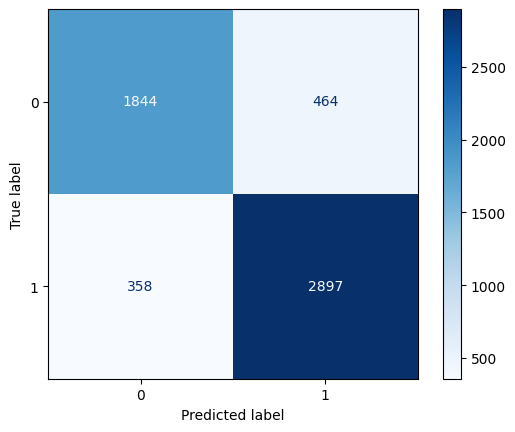

In [ ]:
classify_logistic(X_train_final, Y_train, X_test_final, Y_test)

classification accuracy: 0.8516987237102283
classification report               precision    recall  f1-score   support

           0       0.81      0.84      0.83      2308
           1       0.89      0.86      0.87      3255

    accuracy                           0.85      5563
   macro avg       0.85      0.85      0.85      5563
weighted avg       0.85      0.85      0.85      5563



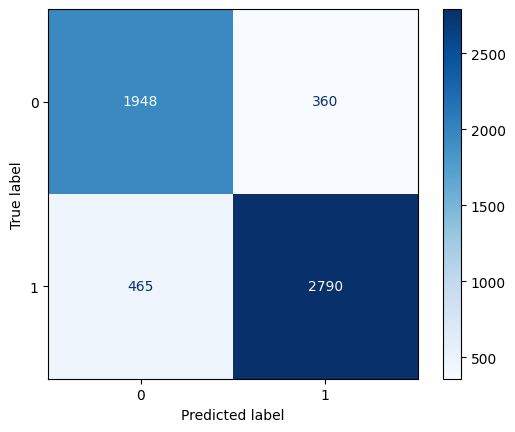

In [ ]:
classify_logistic(X_train_final, Y_train, X_test_final, Y_test, class_weight='balanced')

classification accuracy: 0.8499011324824735
classification report               precision    recall  f1-score   support

           0       0.84      0.79      0.81      2308
           1       0.86      0.89      0.87      3255

    accuracy                           0.85      5563
   macro avg       0.85      0.84      0.84      5563
weighted avg       0.85      0.85      0.85      5563



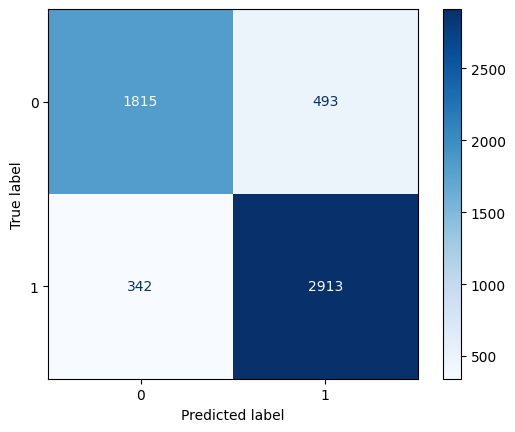

In [ ]:
classify_svc(X_train_final, Y_train, X_test_final, Y_test)

classification accuracy: 0.8472047456408413
classification report               precision    recall  f1-score   support

           0       0.81      0.83      0.82      2308
           1       0.88      0.86      0.87      3255

    accuracy                           0.85      5563
   macro avg       0.84      0.84      0.84      5563
weighted avg       0.85      0.85      0.85      5563



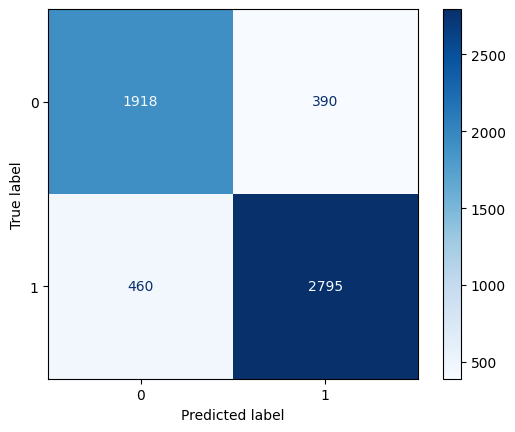

In [ ]:
classify_svc(X_train_final, Y_train, X_test_final, Y_test, class_weight='balanced')

classification accuracy: 0.8410929354664749
classification report               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2308
           1       0.86      0.88      0.87      3255

    accuracy                           0.84      5563
   macro avg       0.84      0.83      0.84      5563
weighted avg       0.84      0.84      0.84      5563



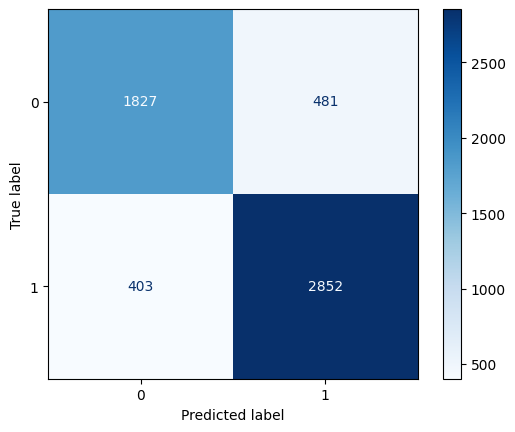

In [51]:
classify_rf(X_train_final, Y_train, X_test_final, Y_test)

# PCA

In [84]:
# Now, apply PCA to retain 95% of the variance
X_train_pca, X_test_pca, pca = apply_pca(X_train_final, X_test_final, n_components=0.95)

# Or, apply PCA to get exactly 10 components
# X_train_pca, X_test_pca, pca = apply_pca(X_train_final, X_test_final, n_components=10)

Original number of features: 14
Number of components selected: 10
Total variance explained by selected components: 0.9572


classification accuracy: 0.8055006291569297
classification report               precision    recall  f1-score   support

           0       0.74      0.81      0.78      2308
           1       0.86      0.80      0.83      3255

    accuracy                           0.81      5563
   macro avg       0.80      0.81      0.80      5563
weighted avg       0.81      0.81      0.81      5563



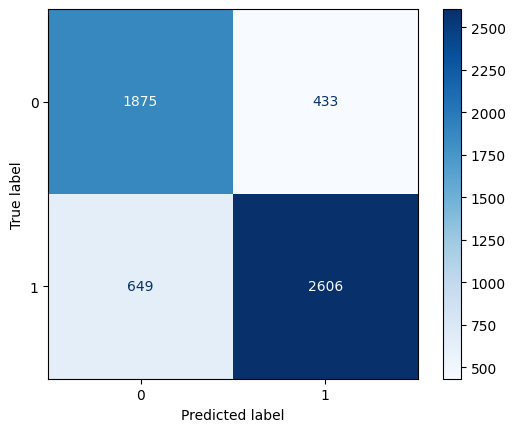

In [85]:

classify_logistic(X_train_pca, Y_train, X_test_pca, Y_test, class_weight='balanced')
#X_train_pca.shape

# Extra preprocessing {can be considered} Not complete yet....

In [ ]:
high_cardinality_cols = ['City', 'Degree']
CITY_THRESHOLD = 800
DEGREE_THRESHOLD = 800
def group_rare_categories(df, column, threshold, new_category_name):
    """Groups categories in a column that fall below the specified threshold."""
    counts = df[column].value_counts()
    categories_to_replace = counts[counts < threshold].index
    new_col_name = f'{column}_Grouped'
    df[new_col_name] = df[column].replace(categories_to_replace, new_category_name)
    df = df.drop(columns=[column])

    print(f"Grouped rare values in '{column}'. Original unique count: {len(counts)} -> New unique count: {df[new_col_name].nunique()}")
    return df

data_grped= group_rare_categories(data_ohe, 'City', CITY_THRESHOLD, 'Other_City')
data_grped= group_rare_categories(data_ohe, 'Degree', DEGREE_THRESHOLD, 'Other_Degree')

ohe_cols_grouped = ['City_Grouped', 'Degree_Grouped']

KeyError: 'City'

In [ ]:
data_grped

NameError: name 'data_grped' is not defined

# **Next**